<img src='../images/ga_logo_large.png' style="display: block; margin-left: auto; margin-right: auto;">

---
## **Project 4: Stocks and Portfolios**

---
### **EDA and Visualizations: Stocks Data**

In [4]:
# modules needed for this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other modules
from datetime import datetime as dt

In [5]:
# read in clean file
file_path = '../data/clean_data/stocks-clean-data.csv'

stocks = pd.read_csv(file_path)
stocks.drop(columns = 'Unnamed: 0', inplace = True)

# check dimensions and first few rows
print(stocks.shape)
stocks.head()

(26308, 12)


,trading_volume,volume_weighted,open_price,close_price,highest_price,lowest_price,timestamp,transactions,Symbol,price_range,volatility,price_change_percentage
0,119605127.0,233.6043,234.45,230.76,236.85,227.76,1729396800000,1743438,AAPL,9.09,3.69,-1.573896
1,358320463.0,230.2414,224.50,235.00,237.49,221.33,1728187200000,5563002,AAPL,16.16,10.50,4.677060
2,411269719.0,227.1824,227.34,226.80,233.00,223.02,1726977600000,5835500,AAPL,9.98,0.54,-0.237530
3,737776128.0,223.8730,220.82,228.20,233.09,213.92,1725768000000,7473637,AAPL,19.17,7.38,3.342089
4,374000504.0,225.6062,226.76,220.82,232.92,217.48,1724558400000,5682718,AAPL,15.44,5.94,-2.619510


See all column names:

In [7]:
stocks.columns

Index(['trading_volume', 'volume_weighted', 'open_price', 'close_price',
       'highest_price', 'lowest_price', 'timestamp', 'transactions', 'Symbol',
       'price_range', 'volatility', 'price_change_percentage'],
      dtype='object')

In [8]:
# make two column name changes
stocks.rename(columns = {'volume_weighted':'weighted_volume',
                          'Symbol': 'symbol'
                         }, inplace = True)

In [9]:
# check nulls and data types
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26308 entries, 0 to 26307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trading_volume           26308 non-null  float64
 1   weighted_volume          26308 non-null  float64
 2   open_price               26308 non-null  float64
 3   close_price              26308 non-null  float64
 4   highest_price            26308 non-null  float64
 5   lowest_price             26308 non-null  float64
 6   timestamp                26308 non-null  int64  
 7   transactions             26308 non-null  int64  
 8   symbol                   26308 non-null  object 
 9   price_range              26308 non-null  float64
 10  volatility               26308 non-null  float64
 11  price_change_percentage  26308 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 2.4+ MB


No missing data.  All data types look good.

Use the `timestamp` column to create a `date` column.

In [12]:
# convert to seconds then transform to date time object
stocks['date'] = stocks['timestamp'].map(lambda x: dt.fromtimestamp(x/1000))

In [13]:
# confirm
print(stocks.shape)
stocks.tail()

(26308, 13)


,trading_volume,weighted_volume,open_price,close_price,highest_price,lowest_price,timestamp,transactions,symbol,price_range,volatility,price_change_percentage,date
26303,6153143.0,18.1118,18.00,18.44,18.73,17.470,1671339600000,67214,NWS,1.260,0.44,2.444444,2022-12-18
26304,10275168.0,18.5034,19.40,18.07,19.40,17.845,1670130000000,102374,NWS,1.555,1.33,-6.855670,2022-12-04
26305,7993945.0,18.6242,17.90,19.43,19.67,17.645,1668920400000,87526,NWS,2.025,1.53,8.547486,2022-11-20
26306,13654984.0,17.5333,17.03,18.17,18.69,15.150,1667707200000,138506,NWS,3.540,1.14,6.694069,2022-11-06
26307,13034580.0,17.0190,17.34,16.92,17.66,16.200,1666497600000,113603,NWS,1.460,0.42,-2.422145,2022-10-23


---
### **Functions**
Non-native functions applicable to this notebook are listed in this section.

**Plot histogram and boxplot for a column**

In [16]:
def plot_hist_box(df, col_name, title = None, xlabel = None):
    '''
    This function plots a histogram and a boxplot of a column.
    
    Parameters:
    col_name: string, this is the column's name
    title: string, the plot title.  Default value is a blank string.
    xlabel: string, the x-axis label.  Default value is a blank string.
    
    Return:
    It returns two plots.  A histogram on the left and a boxplot on the right.
    '''

    plt.figure(figsize = (16, 6))

    plot1 = plt.subplot(1, 2, 1)  # for histogram
    plot2 = plt.subplot(1, 2, 2)  # for box plot

    # histogram ---------------------------------------------------------------------------------------------
    plot1.hist(df[col_name], bins = 25, color = '#00bcd4', edgecolor = '#ffffff');
    plot1.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14)
    plot1.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot1.spines['top'].set_visible(False)
    plot1.spines['right'].set_visible(False)
    plot1.tick_params(axis = 'both', which = 'both', colors = '#6e6e6e', labelsize = 12);
    
    
    # box plot -----------------------------------------------------------------------------------------------
    sns.boxplot(data = df[col_name], ax = plot2, orient = 'h', color = '#00bcd4', medianprops = {'color':'#FFFFFF'});
    plot2.set_title(title, fontweight = 'bold', color = '#6e6e6e', fontsize = 14);
    plot2.spines['top'].set_visible(False)
    plot2.spines['left'].set_visible(False)
    plot2.spines['right'].set_visible(False)
    plot2.set_xlabel(xlabel, color = '#6e6e6e', fontsize = 14)
    plot2.tick_params(axis = 'x', which = 'both', colors = '#6e6e6e', labelsize = 12);

**Plot heatmap for given number of columns**

In [18]:
def plot_heatmap(df, columns):
    '''
    This function plots a heatmap of the number of columns passed in.
    
    Parameters:
    columns: list, a list of columns to plot.
    
    Return:
    It returns a heatmap of the columns.
    '''

    plt.figure(figsize = (12, 12))

    # heatmap setup
    corrs = round(df[columns].corr(), 2)
    mask = np.zeros_like(corrs)
    mask[np.triu_indices_from(mask)] = True

    # plot heatmap
    sns.heatmap(corrs,
                square = True,
                annot = True,
                cmap = 'Blues',
                mask = mask,
                vmin = -1,
                vmax = 1);

**Plot Scatter Plots**

In [20]:
def scatter_plots(start, stop):
    '''
    Fill in...
    '''
    plt.figure(figsize = (15, 5))
    
    for idx, symbol in enumerate(tickers[start:stop]):
        
        x = stocks[stocks['symbol'] == symbol]['volume_weighted']
        y = stocks[stocks['symbol'] == symbol]['volatility']
        
        ax = plt.subplot(1, 5, idx+1)
        ax.scatter(x, y, color = '#00bcd4', edgecolors = '#ffffff')
        
        trend = np.polyfit(x, y, 1)
        trend_line = np.poly1d(trend)
        correlation = round(np.corrcoef(x, y)[0, 1], 2)

        ax.plot(x, trend_line(x), color = '#003366', linestyle = '--')
        
        ax.set_title(f'{symbol}:  {correlation}');

---
### **Correlations**

Start with a pairplot to see what's going on at a high level.

<Figure size 1200x1200 with 0 Axes>

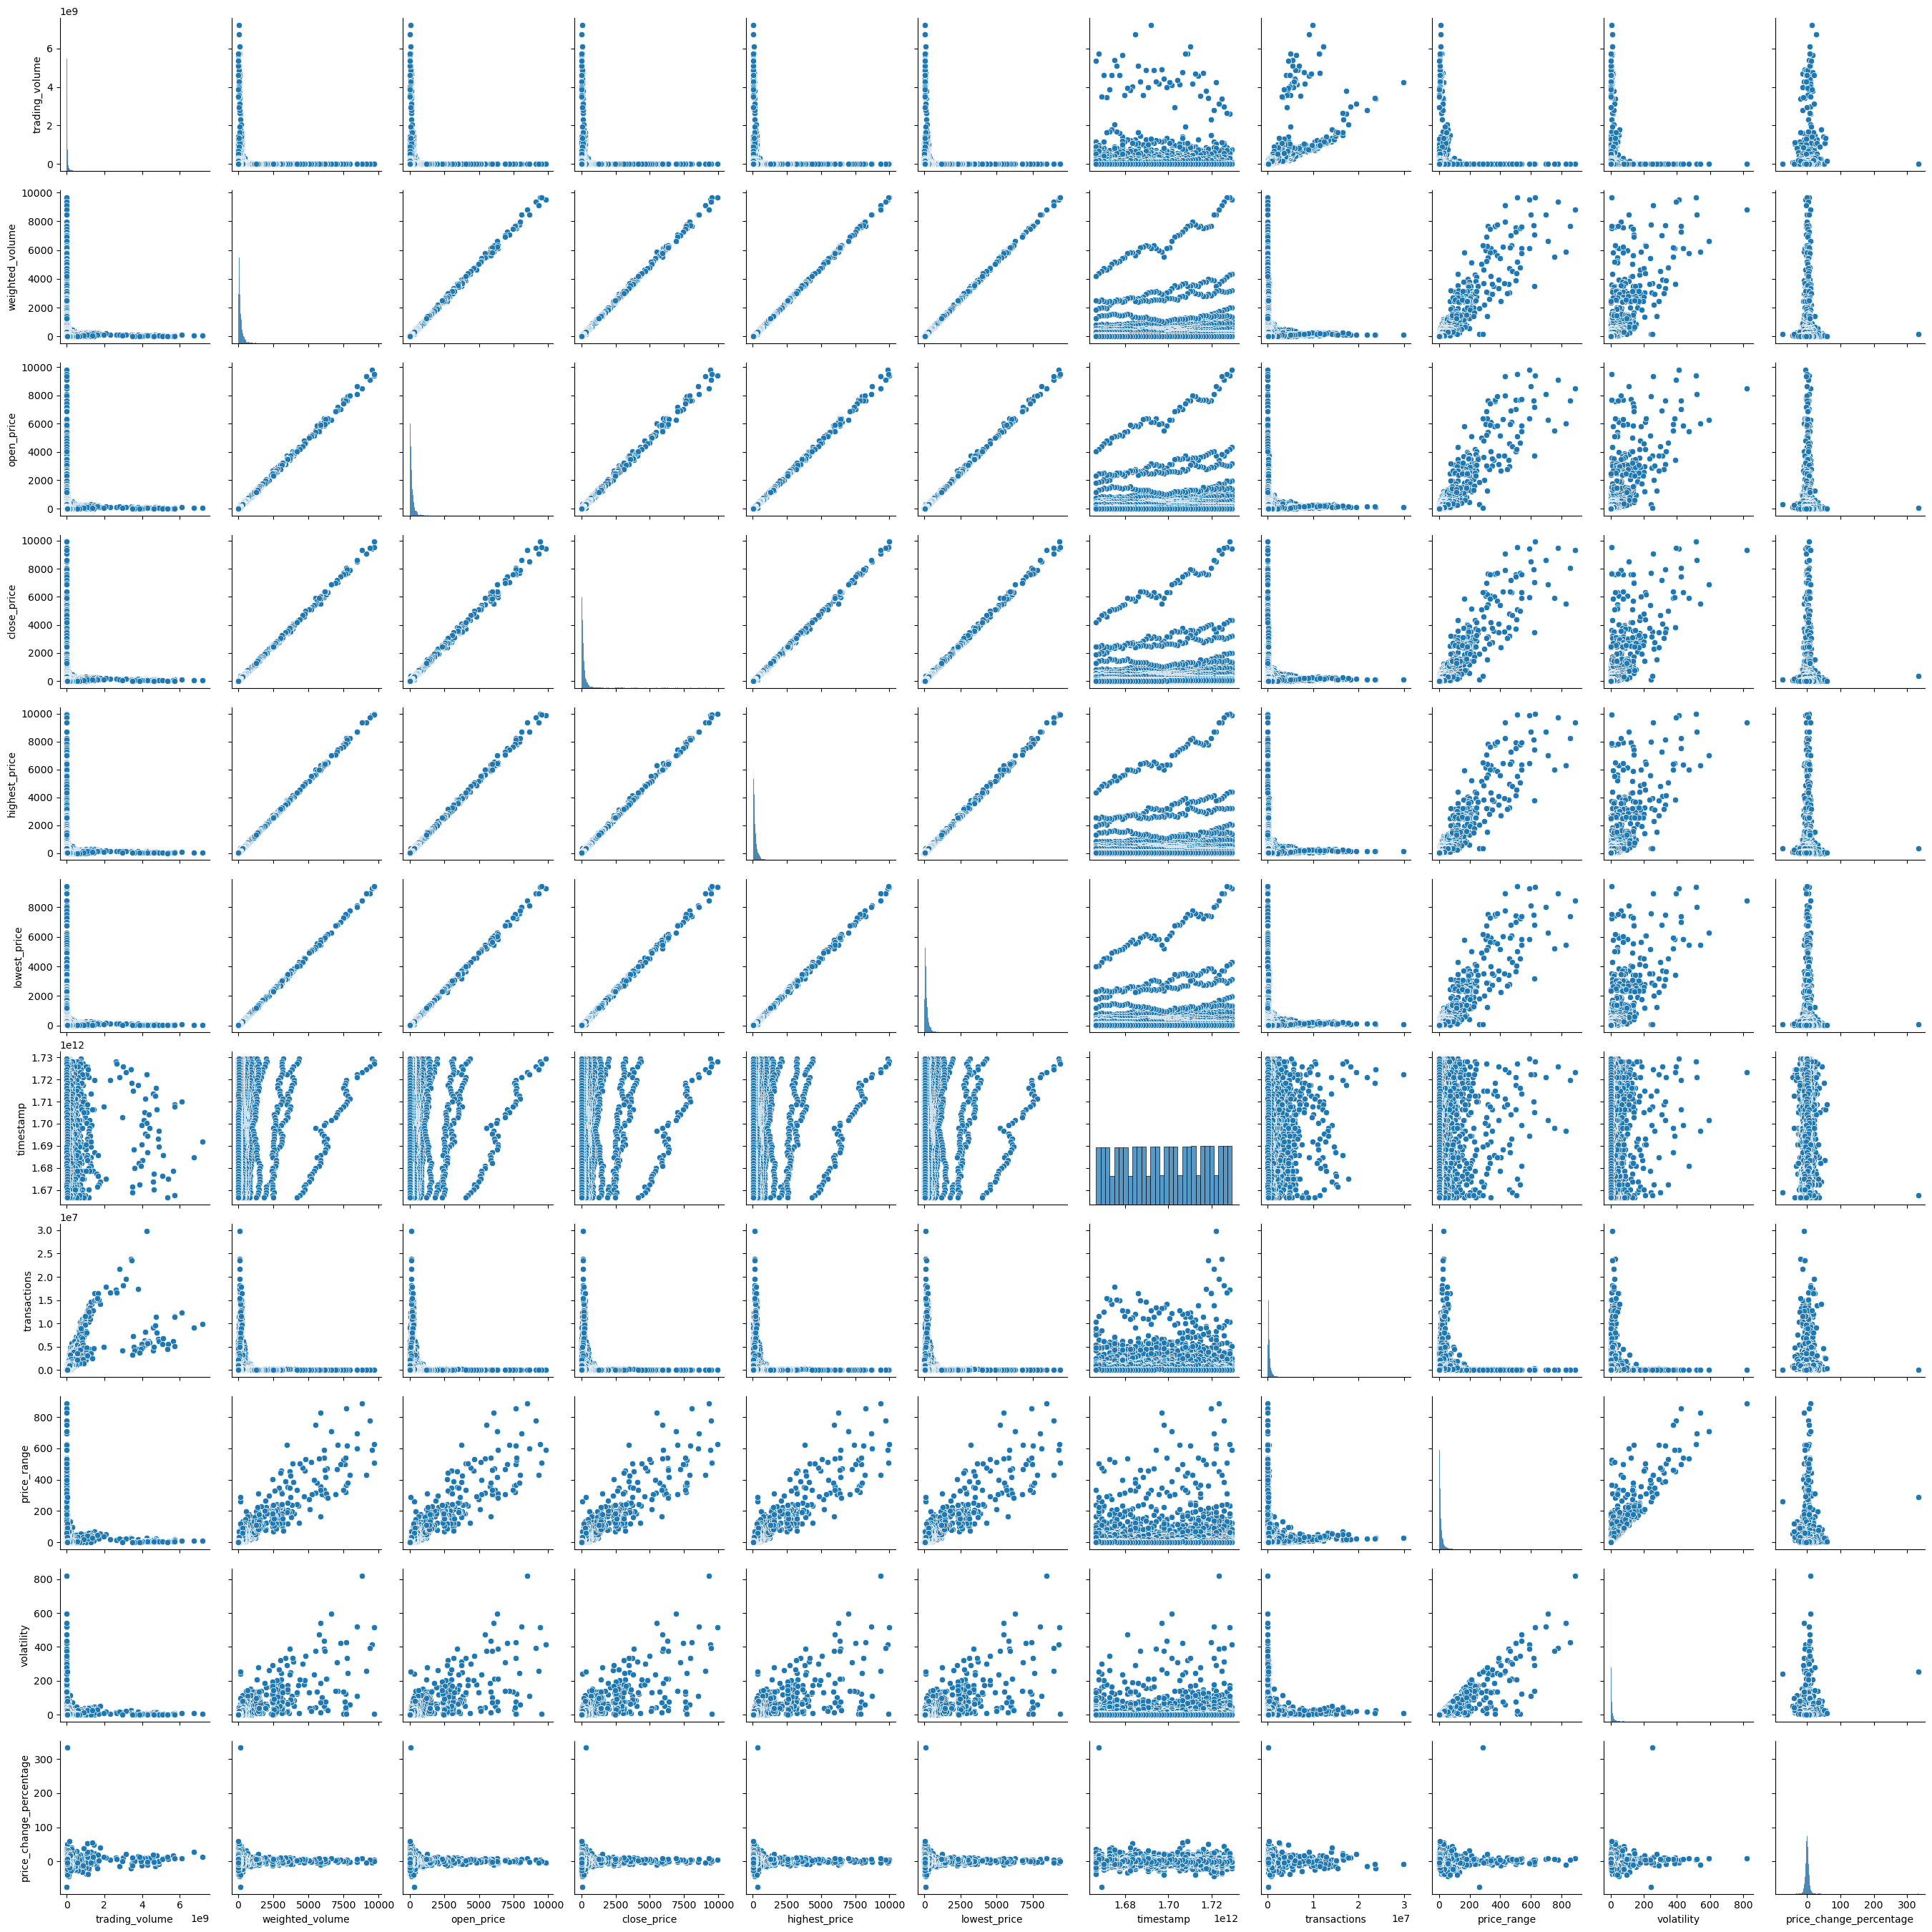

In [23]:
plt.figure(figsize = (12, 12));
sns.pairplot(stocks);
#plt.savefig('../images/stocks_pairplot.png');

There are lots of possible correlations worth exploring.  Let's take a look at some. But first, build a heatmap to see which correlations to prioritize exploring.

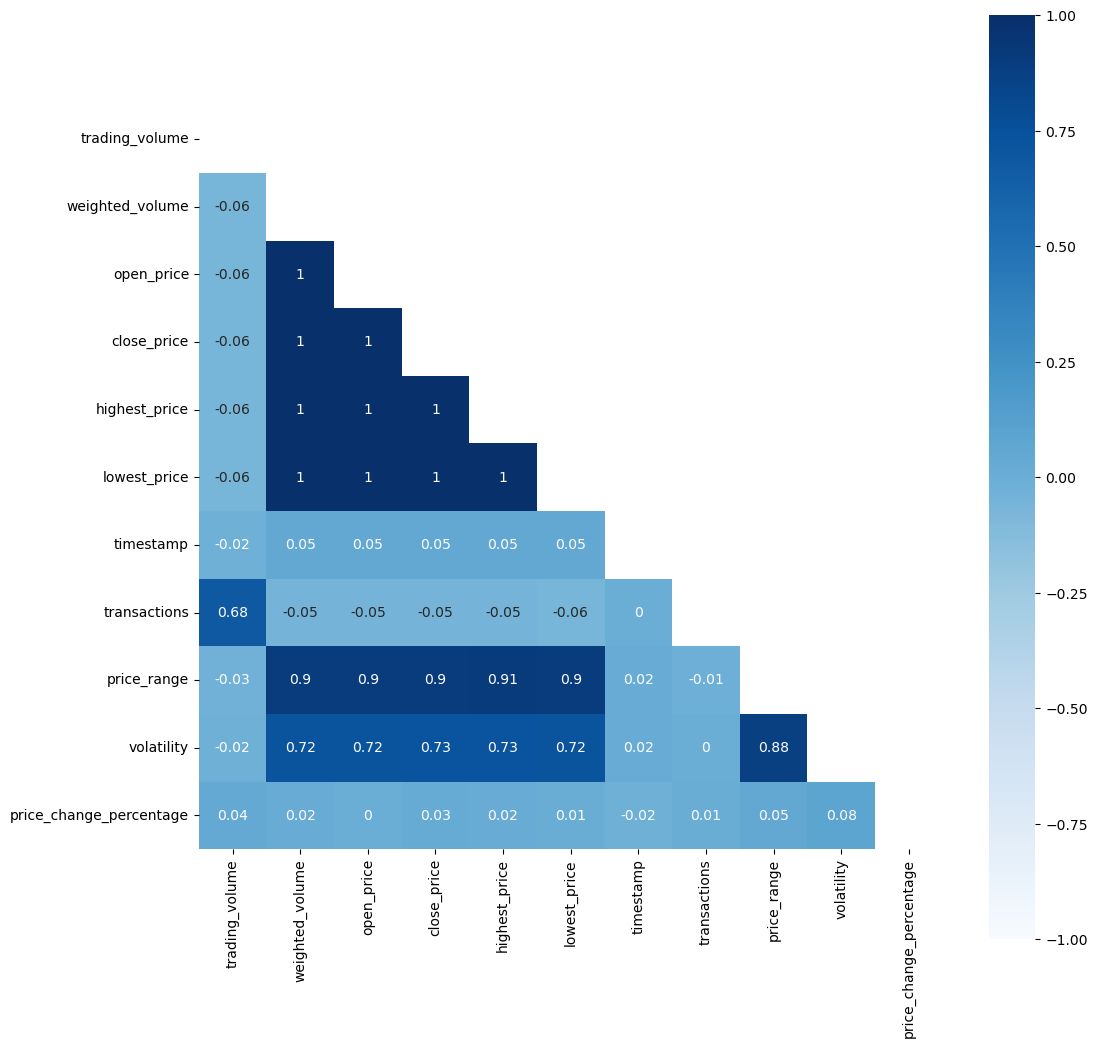

In [25]:
plot_heatmap(stocks, 
             stocks.drop(columns = ['symbol', 'date']).columns)
#plt.savefig('../images/stocks_heatmap.png')

Some relationships worth exploring first are `weighted_volume` vs `volatility`, `weighted_volume` vs. `price_range`, and `price_range` vs. `volatility`.

---
**Weighted Volume vs. Volatility**

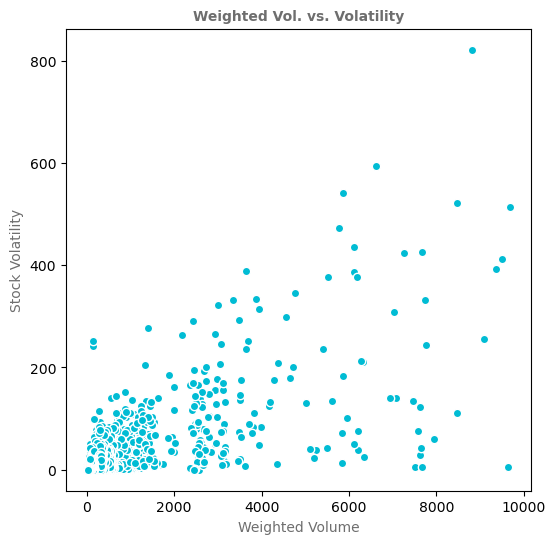

In [28]:
plt.figure(figsize = (6, 6))
plot1 = plt.subplot(1, 1, 1)

plot1.scatter(stocks['weighted_volume'],
              stocks['volatility'],
              color = '#00bcd4',
              edgecolors = '#ffffff')



plot1.set_title('Weighted Vol. vs. Volatility', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)
plot1.set_xlabel('Weighted Volume', color = '#6e6e6e', fontsize = 10)
plot1.set_ylabel('Stock Volatility', color = '#6e6e6e', fontsize = 10);

#plt.savefig('../images/scatterplot_vol_vs_volatility.png')

The chart highlights the positive correlation between both variables.  Higher trading volume correlates well with stock volatility.

**Column**: `volume_weighted`

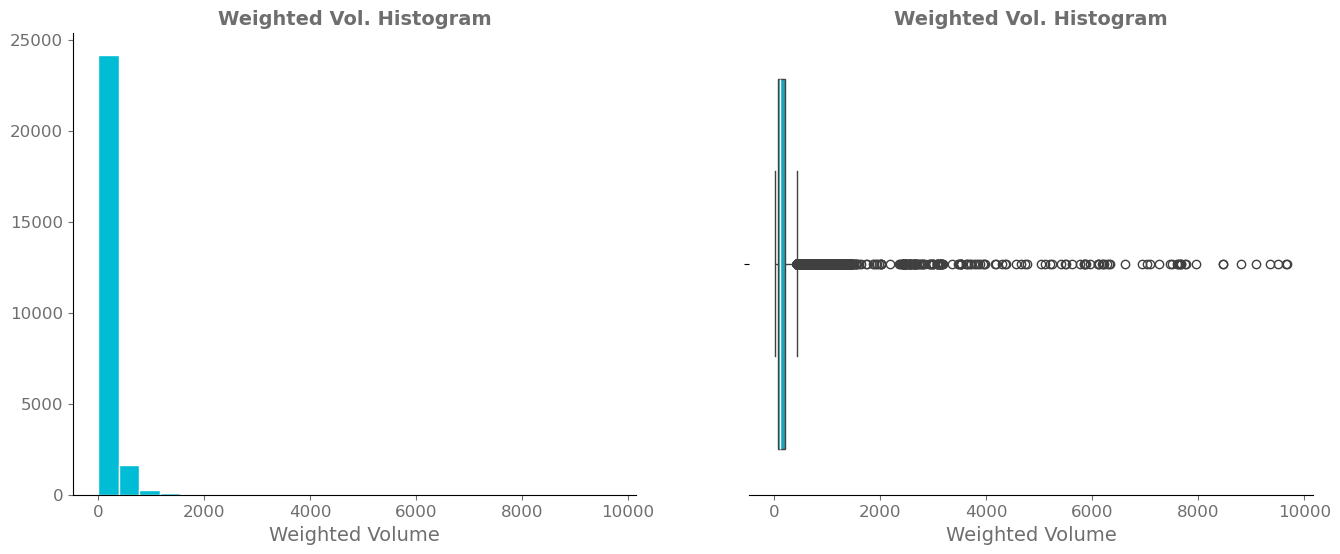

In [31]:
plot_hist_box(stocks, 'weighted_volume',
              title = 'Weighted Vol. Histogram',
              xlabel = 'Weighted Volume')

#plt.savefig('../images/hist_&_boxplot_volume_weighted.png')

In [32]:
stocks['weighted_volume'].describe().round().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
weighted_volume,26308.0,184.0,384.0,6.0,60.0,109.0,205.0,9679.0


The `volume_weighted` data is characterized by lots of outliers as evidenced by the charts and stats displayed above.

**Column**: `volatility`

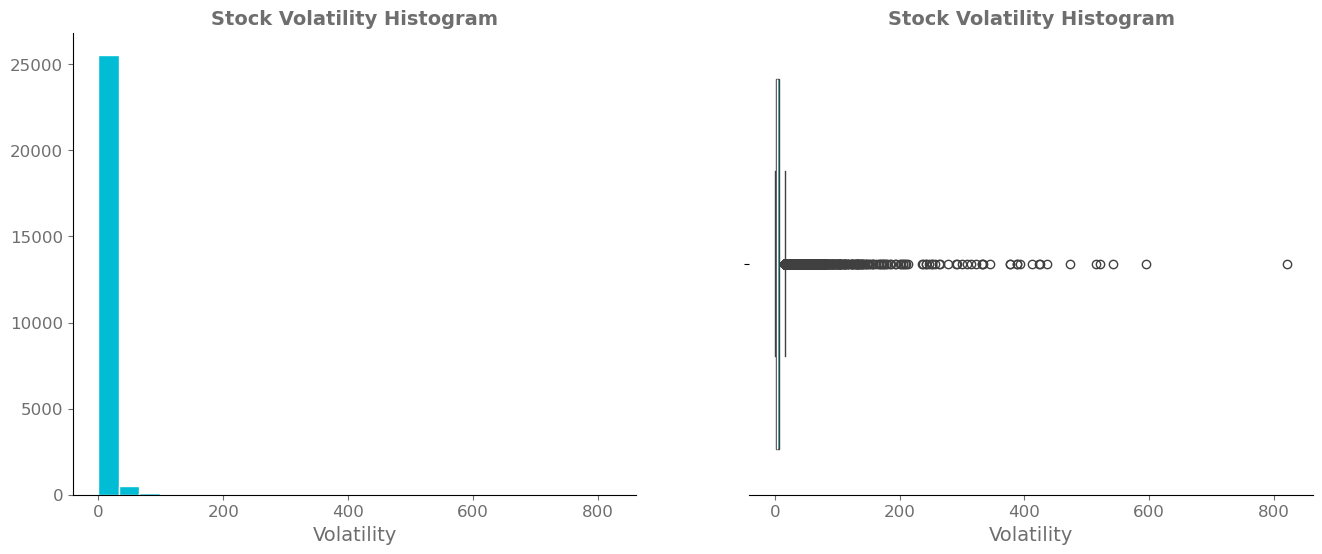

In [35]:
plot_hist_box(stocks, 'volatility',
              title = 'Stock Volatility Histogram',
              xlabel = 'Volatility')

#plt.savefig('../images/hist_&_boxplot_volatility.png')

In [36]:
stocks['volatility'].describe().round().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
volatility,26308.0,7.0,18.0,0.0,1.0,3.0,7.0,821.0


The `volatility` data is characterized by even more outliers as evidenced by the charts and stats displayed above.

---
**Weighted Volume vs. Price Range**

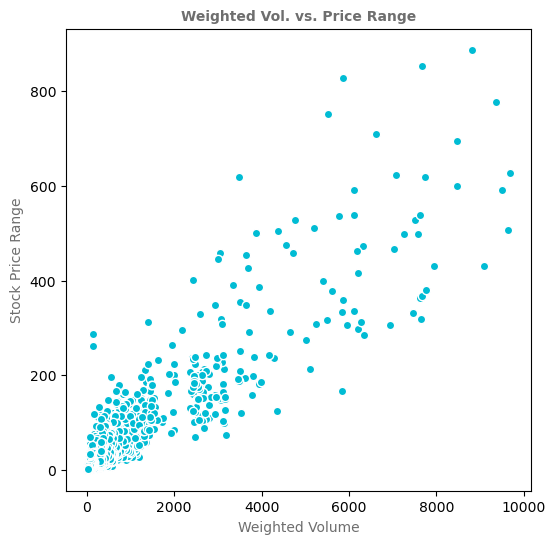

In [39]:
plt.figure(figsize = (6, 6))
plot1 = plt.subplot(1, 1, 1)

plot1.scatter(stocks['weighted_volume'],
              stocks['price_range'],
              color = '#00bcd4',
              edgecolors = '#ffffff')



plot1.set_title('Weighted Vol. vs. Price Range', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)
plot1.set_xlabel('Weighted Volume', color = '#6e6e6e', fontsize = 10)
plot1.set_ylabel('Stock Price Range', color = '#6e6e6e', fontsize = 10);

#plt.savefig('../images/scatterplot_vol_vs_pricerange.png')

The chart also highlights the positive correlation between both variables.  Higher trading volume correlates well with stock price range.

**Column**: `price_range`

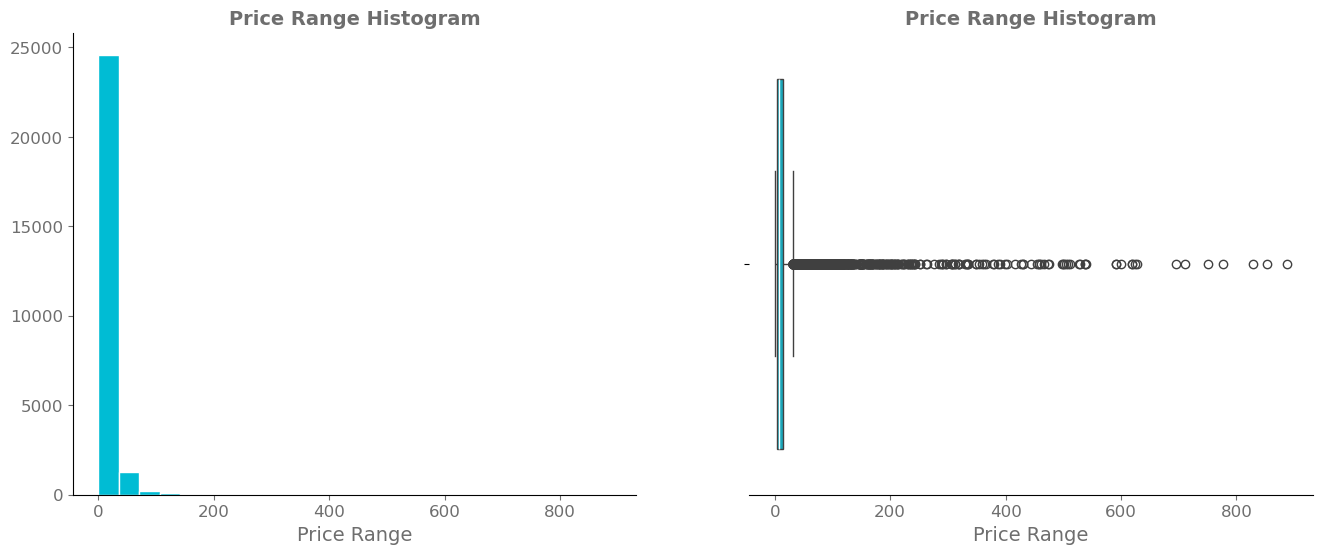

In [42]:
plot_hist_box(stocks, 'price_range',
              title = 'Price Range Histogram',
              xlabel = 'Price Range')

#plt.savefig('../images/hist_&_boxplot_pricerange.png')

In [43]:
stocks['price_range'].describe().round().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
price_range,26308.0,14.0,30.0,0.0,4.0,8.0,15.0,888.0


The `price_range` data is also characterized by a lot of outliers as evidenced by the charts and stats displayed above.

---
**Price Range vs. Volatility**

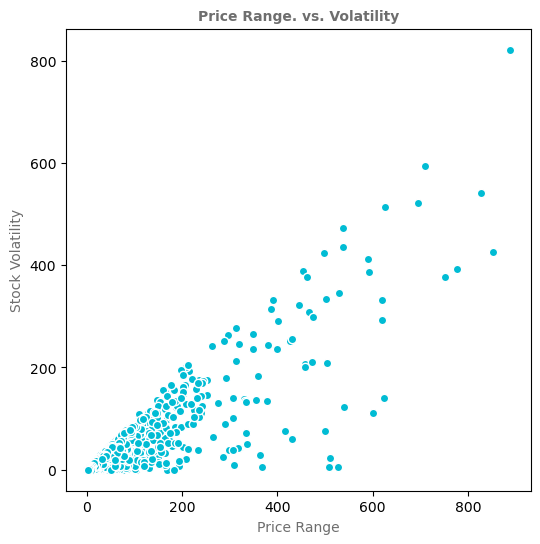

In [46]:
plt.figure(figsize = (6, 6))
plot1 = plt.subplot(1, 1, 1)

plot1.scatter(stocks['price_range'],
              stocks['volatility'],
              color = '#00bcd4',
              edgecolors = '#ffffff')



plot1.set_title('Price Range. vs. Volatility', fontweight = 'bold', color = '#6e6e6e', fontsize = 10)
plot1.set_xlabel('Price Range', color = '#6e6e6e', fontsize = 10)
plot1.set_ylabel('Stock Volatility', color = '#6e6e6e', fontsize = 10);

#plt.savefig('../images/scatterplot_pricerange_vs_volatility.png')

Unsurprisingly, the chart highlights the positive correlation between `price_range` and `volatility`.  Bigger price swings over time correlate well with volatility.

Given the strong correlation between `weighted_volume` and `volatility` for the overall population.  Let's explore this specific correlation by individual stocks.

In [49]:
# 1:  group by stock symbol and calculate correlation between weighted vol and volatility
# build a new DF with this logic
stock_correlations = stocks.groupby('symbol')[['weighted_volume', 'volatility']].corr().reset_index()

# 2:  then select ONLY the rows were the correlation values are NOT 1.0
# reassign to dataframe
stock_correlations = stock_correlations[stock_correlations['volatility'] != 1]

# 3:  then drop all columns but symbol and volatility
stock_correlations.drop(columns = ['level_1', 'weighted_volume'], inplace = True)

# 4:  then rename volatility column to corr_weighted_vol_vs_volatility
stock_correlations.rename(columns = {'volatility': 'corr_weighted_vol_vs_volatility'}, inplace = True)

# 5:  then reset the index
stock_correlations.reset_index(drop = True, inplace = True)

# 6:  confirm results
print(stock_correlations.shape)
stock_correlations.tail()

(503, 2)


,symbol,corr_weighted_vol_vs_volatility
498,XYL,0.003643
499,YUM,-0.191420
500,ZBH,0.009146
501,ZBRA,-0.047176
502,ZTS,-0.329070


This new dataframe (`stock_correlations`) contains each single stock from the population with its respective correlation coefficient between the `weighted_volume` and `volatility` columns.<br>
Repeat the exercise with the other two correlations we'd like to explore: `weighted_vol` vs. `price_range`, and `price_range` vs `volatility`.

In [51]:
# 1:  group by stock symbol and calculate desired correlation
# build a new DF with this logic
df1 = stocks.groupby('symbol')[['weighted_volume', 'price_range']].corr().reset_index()
df2 = stocks.groupby('symbol')[['price_range', 'volatility']].corr().reset_index()

# 2:  then select ONLY the rows were the correlation values are NOT 1.0
# reassign to dataframe
df1 = df1[df1['price_range'] != 1]
df2 = df2[df2['volatility'] != 1]

# 3:  then drop unneeded columns
df1.drop(columns = ['level_1', 'weighted_volume'], inplace = True)
df2.drop(columns = ['level_1', 'price_range'], inplace = True)

# 4:  then reset the index
df1.reset_index(drop = True, inplace = True)
df2.reset_index(drop = True, inplace = True)

# 5:  then add as new column to stock_correlations DF
stock_correlations['corr_weighted_vol_vs_price_range'] = df1['price_range']
stock_correlations['corr_price_range_vs_volatility'] = df2['volatility']

# 6:  confirm results
print(stock_correlations.shape)
stock_correlations.tail(2)

(503, 4)


,symbol,corr_weighted_vol_vs_volatility,corr_weighted_vol_vs_price_range,corr_price_range_vs_volatility
501,ZBRA,-0.047176,-0.039267,0.664490
502,ZTS,-0.329070,-0.319157,0.741497


In [52]:
stock_correlations.describe()

,corr_weighted_vol_vs_volatility,corr_weighted_vol_vs_price_range,corr_price_range_vs_volatility
count,503.000000,503.000000,503.000000
mean,0.095400,0.141327,0.759984
std,0.193763,0.248631,0.099079
min,-0.832480,-0.982539,0.188982
25%,-0.026132,-0.038465,0.705126
50%,0.087449,0.116848,0.769729
75%,0.205797,0.287056,0.828418
max,0.900788,0.904367,0.998784


The stats show a wide range, some correlations are strongly negative, while others are strongly positive.  Let's take a look at how the data is distributed.

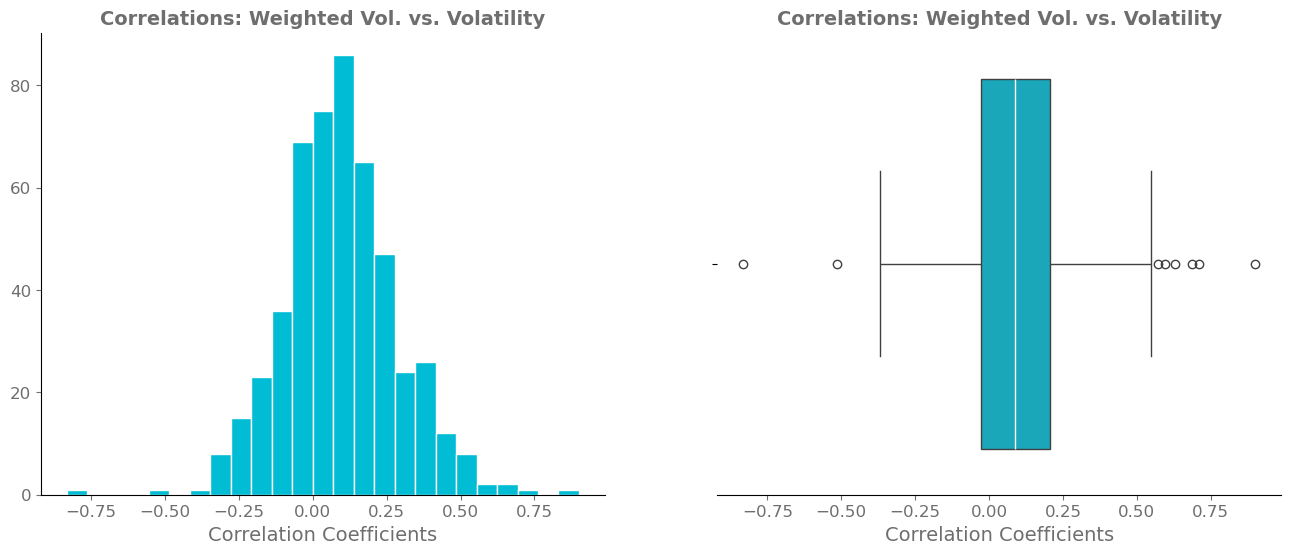

In [54]:
plot_hist_box(df = stock_correlations, 
              col_name = 'corr_weighted_vol_vs_volatility', 
              title = 'Correlations: Weighted Vol. vs. Volatility',
              xlabel = 'Correlation Coefficients')

#plt.savefig('../images/hist_&_boxplot_correlation01.png')

The correlation data for these two columns (`weighted_volume` vs. `volatility`) follows a normal pattern, with some outliers on both ends.

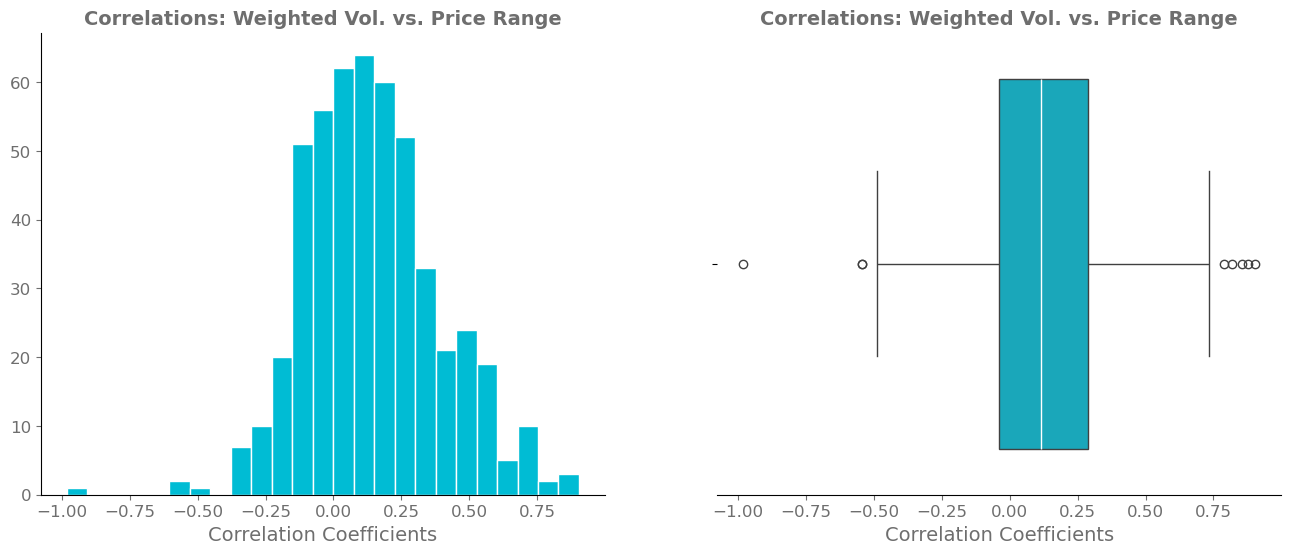

In [56]:
plot_hist_box(df = stock_correlations, 
              col_name = 'corr_weighted_vol_vs_price_range', 
              title = 'Correlations: Weighted Vol. vs. Price Range',
              xlabel = 'Correlation Coefficients')

#plt.savefig('../images/hist_&_boxplot_correlation02.png')

The correlation data for these two columns (`weighted_volume` vs. `price_range`) also follows closely a normal pattern, with a few outliers on both ends.

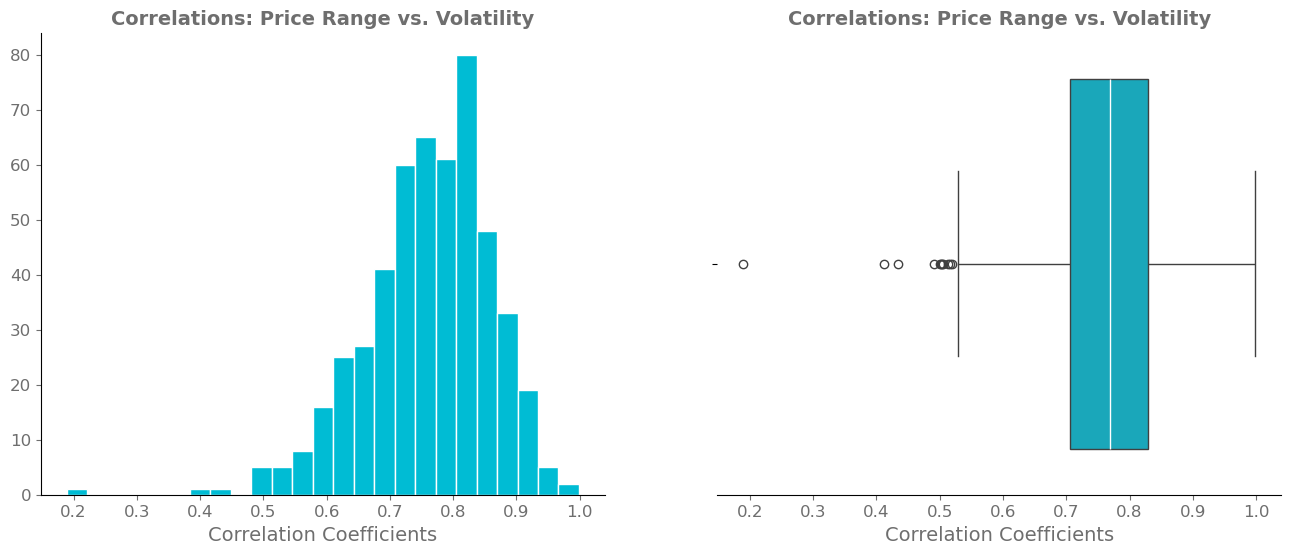

In [58]:
plot_hist_box(df = stock_correlations, 
              col_name = 'corr_price_range_vs_volatility', 
              title = 'Correlations: Price Range vs. Volatility',
              xlabel = 'Correlation Coefficients')

#plt.savefig('../images/hist_&_boxplot_correlation03.png')

The correlation data for these two columns (`price_range` vs. `volatility`) seems slightly left-skewed, with all outliers clearly on the low end.

---
### **Stocks**

Let's segregate individual stocks based on the patterns observed above to see what insights can be discovered.

---
**Weighted Volume vs. Volatility**

What individual stocks exhibit negative correlations in this relationship?<br>
What individual stocks exhibit positive correlations in this relationship?<br>
What is the count for each group?<br>
What is the price performance over the observed period for each group?

In [64]:
# first, add new column to stock_correlations
stock_correlations['avg_pct_change'] = stocks.groupby('symbol')['price_change_percentage'].mean().values

# confirm
stock_correlations.head(2)

,symbol,corr_weighted_vol_vs_volatility,corr_weighted_vol_vs_price_range,corr_price_range_vs_volatility,avg_pct_change
0,A,0.196730,0.134928,0.887184,0.191745
1,AAPL,0.095399,0.167993,0.653506,1.137613


In [65]:
# positively correlated
group1 = stock_correlations[stock_correlations['corr_weighted_vol_vs_volatility'] > 0]
print(f'Positively correlated stocks: {group1.shape[0]}')

# negatively correlated
group2 = stock_correlations[stock_correlations['corr_weighted_vol_vs_volatility'] < 0]
print(f'Positively correlated stocks: {group2.shape[0]}')

Positively correlated stocks: 347
Positively correlated stocks: 156


When it comes to weighted volume vs. volatility, about 69% of the stocks show a positive correlation, and 31% show a negative correlation.<br><br>
In investment circles, for this specific relationship, positively correlated stocks indicate high interest and/or speculative trades, which drive price volatility. Conversely, negatively correlated stocks indicate price stability (less volatility).<br><br>
Let's now visualize that split by performance. Specifically, average percent change of each stock over the observed time.

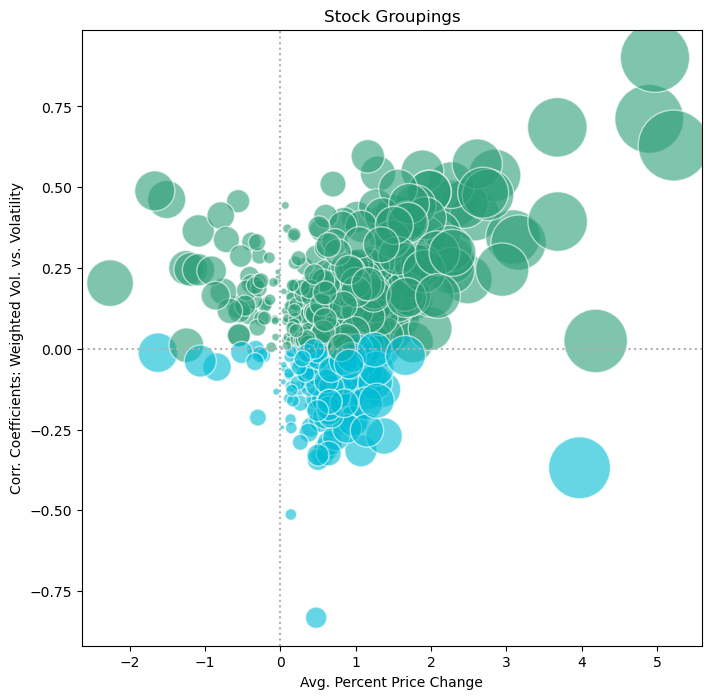

In [155]:
# setup the box
plt.figure(figsize = (8, 8))
plot3 = plt.subplot(1, 1, 1)

# use avg pct change to size bubbles, scale by 500 to make bigger
bubble_sizes = np.abs(stock_correlations['avg_pct_change']) * 500

# assign colors to both groups, red for negative, green for positive
colors = ['#2a9d77' if value > 0 else '#00bcd4' for value in stock_correlations['corr_weighted_vol_vs_volatility']]

# chart and parameters from here on down ---------------------------
plot3.scatter(stock_correlations['avg_pct_change'], 
              stock_correlations['corr_weighted_vol_vs_volatility'], 
              s = bubble_sizes, 
              color = colors, 
              alpha = 0.6, 
              edgecolor = '#ffffff')


plot3.set_title('Stock Groupings')
plot3.set_xlabel('Avg. Percent Price Change')
plot3.set_ylabel('Corr. Coefficients: Weighted Vol. vs. Volatility')

plt.axhline(0, color = '#b0b0b0', linestyle =':')
plt.axvline(0, color = '#b0b0b0', linestyle =':');

plt.savefig('../images/scatterplot_grp1_vs_grp2.png')

The blue bubbles are stocks that are perceived to be stable.  In other words, they have not been subject to speculative trading over the observed time.  The green bubbles are the opposite, they've experienced large price swings over the same period, either because of high investor interest, or speculative trading, or both.<br><br>
The saying, no risk, no reward, holds true here.  The green bubbles in the upper right quadrant have also experienced the greatest average percent price growth amont S&P500 stocks.<br><br>
In summary, most stocks, whether under speculative pressure/high interest or not have enjoyed good returns.  Those are all the bubbles to the right of the vertical dotted line.

---
**Weighted Volume vs. Price Range**

Let's ask the same questions:<br>
What individual stocks exhibit negative correlations in this relationship?<br>
What individual stocks exhibit positive correlations in this relationship?<br>
What is the count for each group?<br>
What is the price performance over the observed period for each group?

In [71]:
# positively correlated
group3 = stock_correlations[stock_correlations['corr_weighted_vol_vs_price_range'] > 0]
print(f'Positively correlated stocks: {group3.shape[0]}')

# negatively correlated
group4 = stock_correlations[stock_correlations['corr_weighted_vol_vs_price_range'] < 0]
print(f'Positively correlated stocks: {group4.shape[0]}')

Positively correlated stocks: 350
Positively correlated stocks: 153


When it comes to weighted volume vs. price range, about 70% of the stocks show a positive correlation, and 30% show a negative correlation.<br><br>
In investment circles, for this specific relationship, positively correlated stocks indicate large price swings, which drive up price volatility. Conversely, negatively correlated stocks indicate price stability (less price movement between highs and lows).<br><br>
Let's now visualize that split, again, by performance. Namely, the average percent change of each stock over the observed time.

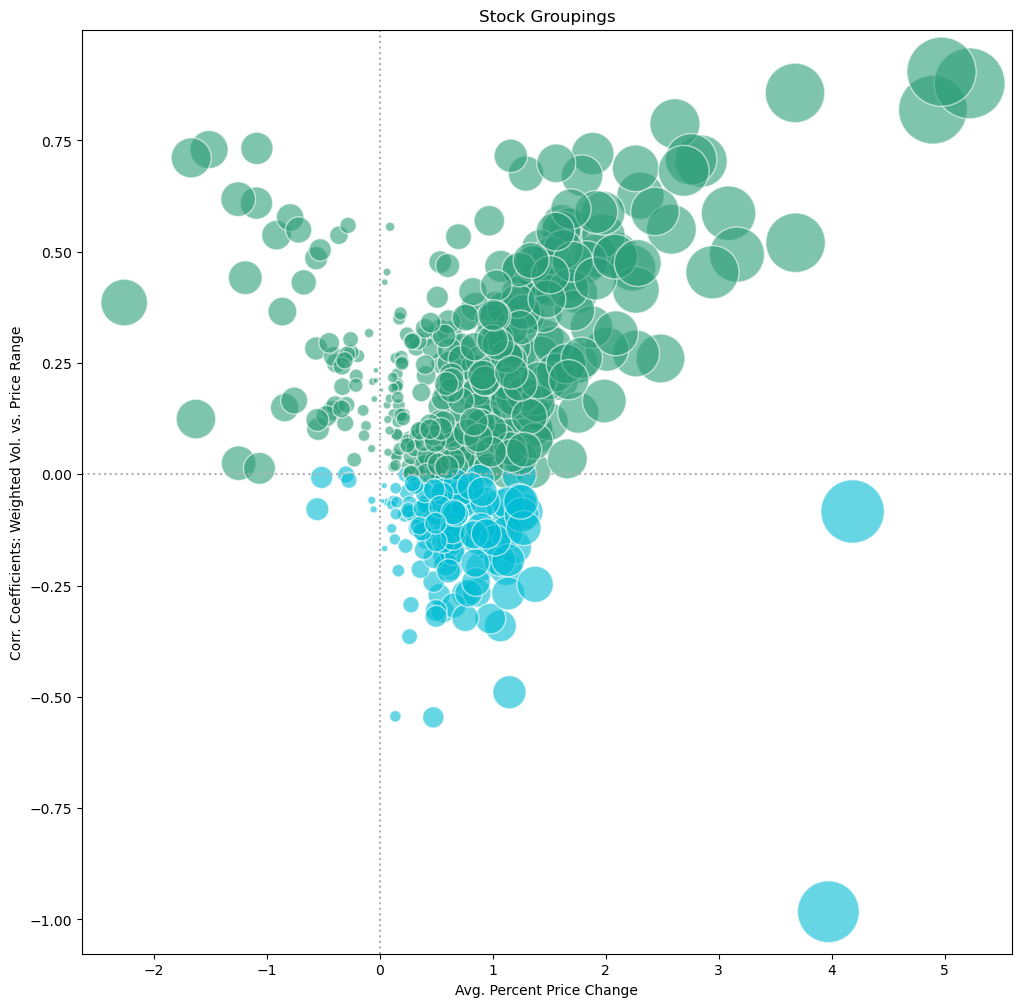

In [136]:
plt.figure(figsize = (12, 12))
plot3 = plt.subplot(1, 1, 1)

bubble_sizes = np.abs(stock_correlations['avg_pct_change']) * 500
colors = ['#2a9d77' if value > 0 else '#00bcd4' for value in stock_correlations['corr_weighted_vol_vs_price_range']]

plot3.scatter(stock_correlations['avg_pct_change'], 
              stock_correlations['corr_weighted_vol_vs_price_range'], 
              s = bubble_sizes, 
              color = colors, 
              alpha = 0.6, 
              edgecolor = '#ffffff')


plot3.set_title('Stock Groupings')
plot3.set_xlabel('Avg. Percent Price Change')
plot3.set_ylabel('Corr. Coefficients: Weighted Vol. vs. Price Range')


plt.axhline(0, color = '#b0b0b0', linestyle =':')
plt.axvline(0, color = '#b0b0b0', linestyle =':');

#plt.savefig('../images/scatterplot_grp3_vs_grp4.png')

The same color scheme applies here.  The blue bubbles are stocks that are perceived to be stable (gradual price movements over time). The green bubbles are the opposite, they've experienced large price swings over the same period. Translation: higher volatility<br><br>
Similar to the previous observation, the green bubbles in the upper right quadrant experienced the greatest average percent price growth amont S&P500 stocks.<br><br>
And once again, most stocks, whether stable or volatile, have enjoyed good returns.  Those are all the bubbles to the right of the vertical dotted line.  Unsurprisingly, very few stable stocks decreased in price over the observed timeline (lower left quadrant).  Most losers are the highly volatile stocks (upper left quadrant).

---
**Price Range vs. Volatility**

The same set of questions apply here:<br>
What individual stocks exhibit negative correlations in this relationship?<br>
What individual stocks exhibit positive correlations in this relationship?<br>
What is the count for each group?<br>
What is the price performance over the observed period for each group?

In [77]:
# positively correlated
group5 = stock_correlations[stock_correlations['corr_price_range_vs_volatility'] > 0]
print(f'Positively correlated stocks: {group5.shape[0]}')

# negatively correlated
group6 = stock_correlations[stock_correlations['corr_price_range_vs_volatility'] < 0]
print(f'Positively correlated stocks: {group6.shape[0]}')

Positively correlated stocks: 503
Positively correlated stocks: 0


When it comes to price range vs. volatility, all stocks show a positive correlation.<br><br>
In investment circles, for this specific relationship, positively correlated stocks also indicate large price swings.  It's just another way to gauge volatility in the market.<br><br>
Let's now visualize the stocks, by price percent performance.

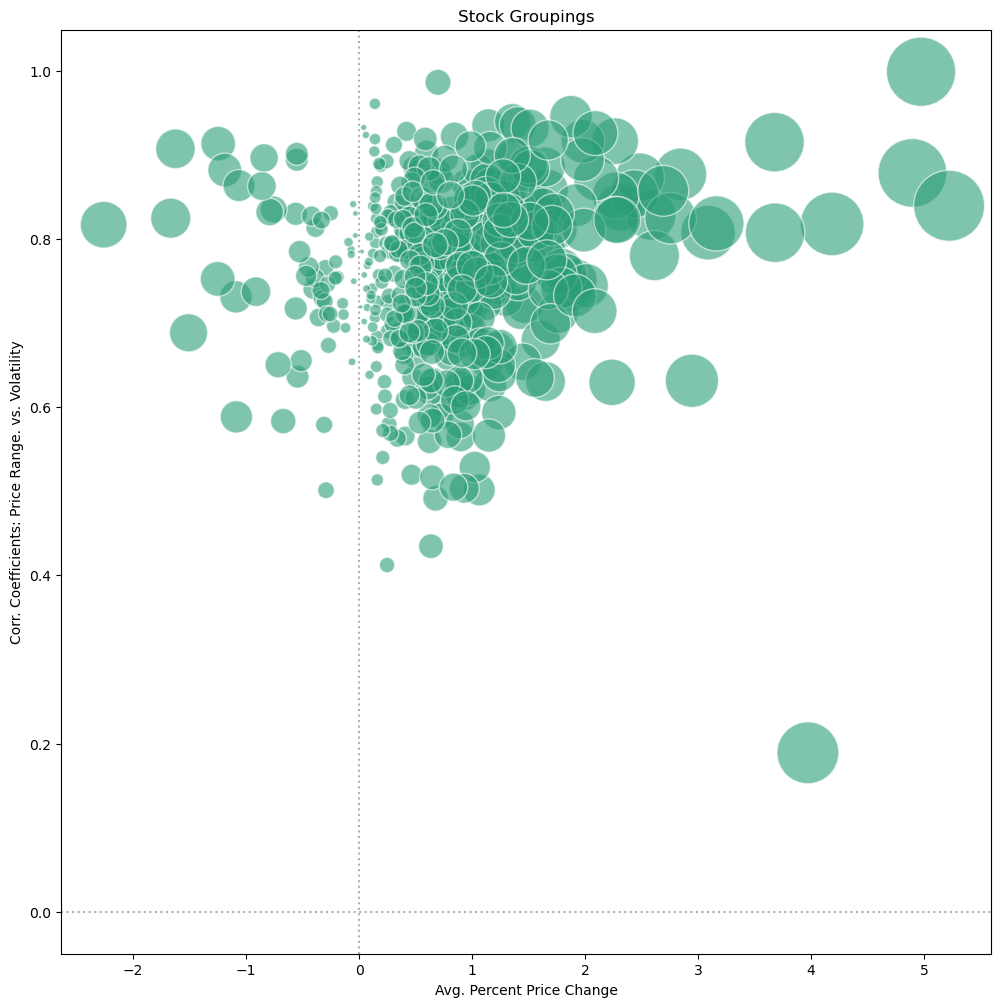

In [138]:
plt.figure(figsize = (12, 12))
plot3 = plt.subplot(1, 1, 1)

bubble_sizes = np.abs(stock_correlations['avg_pct_change']) * 500
colors = ['#2a9d77' if value > 0 else '#00bcd4' for value in stock_correlations['corr_price_range_vs_volatility']]

plot3.scatter(stock_correlations['avg_pct_change'], 
              stock_correlations['corr_price_range_vs_volatility'], 
              s = bubble_sizes, 
              color = colors, 
              alpha = 0.6, 
              edgecolor = '#ffffff')


plot3.set_title('Stock Groupings')
plot3.set_xlabel('Avg. Percent Price Change')
plot3.set_ylabel('Corr. Coefficients: Price Range. vs. Volatility')


plt.axhline(0, color = '#b0b0b0', linestyle =':')
plt.axvline(0, color = '#b0b0b0', linestyle =':');

#plt.savefig('../images/scatterplot_grp5_vs_grp6.png')

What can be inferred from this chart is that most S&P500 stocks are very highly and positively correlated between their price ranges and experienced volatility, and the vast majority have experienced, on average, positive growth in price performance.

Based on this first EDA iteration, the models that will be tried to predict the ideal portfolios based on investor profile, should take into account the relationships that were just explored.

---
**Clean Files**<br>
Save a updated clean version of the main dataframe (`stocks-clean-data.csv`), as well as a copy of the `stock_correlations` dataframe.

In [120]:
output_path1 = '../data/clean_data/stocks-clean-data-2.csv'
output_path2 = '../data/clean_data/stock-correlations.csv'

stocks.to_csv(output_path1, index = False)
stock_correlations.to_csv(output_path2, index = False)